# Linear Regression Techniques

## Overview 

In this notebook, I will attempt to explain linear regression from basic principles of statistics, following the guidance of Elements of Statistical Learning (Hastie, Tibshirani, Friedman). I will then explore three main regularisation methods: Ridge, Lasso and PCA Regression. I will try to draw similarities and illustrate key differences between each method, deriving their mathematical forms where possible. There will be examples using a real dataset which will hopefully show qualities of each method as well as their performances.

## Problem Set-Up

We wish to predict an output of an unknown function, given an input. We do not have the function, but we do have many instances of (input, output) pairs.  We start by making some assumptions and slowly building a model to represent our function.  Suppose we have inputs of dimension $p$, and $N$ datapoints to fit our model.

The data is assumed to be of the form $$ \vec y = f(X) + \text{some noise}, $$ and our model (which is assumed to be correct) is $$ f(X) = X\vec\beta $$ where 

$$
X = 
\begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1P} \\
    x_{21} & x_{22} & \cdots & x_{2P} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N1} & x_{N2} & \cdots & x_{NP} \\
\end{bmatrix},
$$

$$\vec\beta = 
\begin{pmatrix}
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_P \\
\end{pmatrix}.
$$ 

We assume the noise to be of the form 

\begin{align}
\text{some noise} &= \vec\epsilon = 
\begin{pmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_N \\
\end{pmatrix}, \\
\text{where }\epsilon_i &\sim \mathcal{N}(0, \sigma^2) \text{ are IID}.
\end{align}

$\vec{y}$ is an N-dimensional vector, showing all the N data-points we use to train the model.  For each of the input $p$-vectors denoted $\vec{x}_i$ (which are the rows of $X$), we have a corresponding y value in $\mathbb{R}$. We have $N$ of these, thus the $\vec{y}$-vector which shows all of our data is shape $(N\times 1)$.  From here onwards, we assume this is the $\textit{true}$ model of the function. Therefore, we can now go about estimating $\vec\beta$ as best we can.  This estimated $\beta$ we shall denote with a hat: $\hat{\vec\beta}$, while the $\textit{true}$ $\beta$ is assumed to be exactly correct. Once we have an estimate $\hat{\vec\beta}$, we can use the equation above to get a new $y$-prediction from a vector of $p$ inputs by multiplying the $\vec{x}_\text{test}$ into $\hat{\vec\beta}$:

$$
\hat{y} = \vec{x}_\text{test} \cdot \hat{\vec\beta} 
$$

## Background: Least Squares and Expected Prediction Error

In order to formalise a model as 'good' or 'bad', we must define a loss function. A common choice is the least squares, $\mathcal{L} = (y-f(X))^2$. This leads us to the criterion or choosing f

Expected Prediction Error, EPE, is defined by $$ EPE(f) = \mathbb{E}[(Y - f(X))^2]$$

This is the Mean Squared Error (MSE).  We care most about this because it accounts for the entire population.  Suppose we draw a subset $\mathcal{D} \in \mathcal{P}$ where $\mathcal{P}$ is the entire population we wish to model.  We will obtain one setting for our parameters, achieving a certain MSE with the population (true) parameters.  Suppose we draw many of these subsets, and each time estimate new model parameters.  We want to optimise for the average parameter to be as close as possible to the population (true) parameters.

We can decompose the MSE into a bias term and variance term, as well as an additional term if the data has some noise on the model which we assume.  Suppose the population data takes the form $$ y = f(x) + \epsilon, $$ where $\epsilon \sim \mathcal{N}(0,\sigma^2)$ is noise and $f(x)$ is our model with some parameters $\vec \theta$.  $\hat f$ is the model trained on a subset of the population data.  The MSE is 

\begin{align}
\text{MSE} &= \mathbb{E}\left[ (\hat f(x) - y)^2 \right] \\
&= \mathbb{E}\left[ (\hat f(x) - \mathbb{E}(\hat f(x)) + \mathbb{E}(\hat f(x)) - f(x) + \epsilon)^2 \right]\\
&= (\mathbb{E}(\hat f(x)) - y)^2 + \mathbb{E}\left[ (\hat f(x) - \mathbb{E}(\hat f(x)))^2 \right] + \mathbb{E}(\epsilon^2)\\
&= (\mathbb{E}(\hat f(x)) - y)^2 + \mathbb{E}\left[ (\hat f(x) - \mathbb{E}(\hat f(x)))^2 \right] + \sigma^2\\
&= \text{Bias}^2 + \text{Variance} + \sigma^2,
\end{align}

with the cross term vanishing because the expectation $\mathbb{E}(\epsilon) = 0$. This is the famous bias-variance tradeoff.  Both terms are positive semi-definite, but we can appreciate how some models will concede a small amount of bias for a large reduction in variance, thus reducing our expected prediction error, or MSE in this case.


## Motivation For Our Model

#### Why not use a more complex model?

A linear model is in most cases adequate to obtain a good prediction of an output, based on some inputs related linearly to the output. An advantage of using such a simple model is its interpretability and robustness.  Robustness is how resistant the model is to distinct training datasets drawn from the same underlying distribution.  This will mean the model performs well on test sets, as it will not have overfit to training data.  It is important our model is interpretable given the model may in fact teach us something about the underlying system, as long as we can interpret the model's parameters and how they impact the output.  This is one pitfall of more 'black box' models. 

#### Are we assuming the output $y$ has a linear relationship with each of the $p$ inputs?

Yes.  If we have a strong belief that the relationship scales different, we can plot the regression of, say, $y$ against $\sqrt{x}$ or $\log x$.  We can also learn an p-degree polynomial function by allowing $x_2 = x_1^2$, $x_3 = x_1^3$, ..., $x_p = x_1^p$. This is highly versatile.

#### Why do we assume the noise is Gaussian?

Everybody loves Gaussians (probably something to do with CLT)


# Ordinary Least Squares: A Bayesian Approach

The least squares function (Residual Sum of Squares) is $$ RSS(\beta) = (\vec{y} - X\vec\beta)^T(\vec{y} - X\vec\beta). $$

What we are told in our school days is that this function is chosen because it takes the distance of each point from the 'line of best fit' (which in our case will be a hyperplane in $p$ dimensions) and makes the distance positive each time by squaring it. We will see that there is a more proper reason to choose the '2-norm' (2 referring to the power of the norm; the n-norm is $(a^n + b^n)^\frac{1}{n}$); it is related to the assumption we made about the noise term in the data.

#### Likelihood

The likelihood is a concept of how probably some outcome is given our model parameters. This is formally written as $$ P(\vec y | X, \vec\beta). $$ In words, what is the probability of the output being $y$, given the input vector $\vec x$ and the model parameters $\vec \beta$. One additional assumption implicit in the next step is that all the $y_i$ are independent, meaning 
\begin{align}
P(\vec y | x, \vec\beta) &= \prod_{i=1}^N P(y_i | \vec{x}_i, \vec\beta)\\
&= \prod_{i=1}^N \exp\left(-\frac{(y_i - \vec{x}_i \cdot \vec\beta)^2}{2\sigma^2}\right) \\
&= \exp\left(-\frac{(\vec y - X \vec\beta)^T(\vec y - X \vec\beta)}{2\sigma^2}\right)
\end{align}

All we need to do now is maximise this likelihood in order to obtain our best estimate for $\vec\beta$, the parameters of our model. A clever trick is to first take the natural logarithm of the above expression, and instead maximise that.  The reason we will end up with the same answer after taking a log is because the logarithm is a monotonically increasing function, so if the original function reaches a maximum, so does its (negative, because the probability will always be less than 1 so its log will always be negative) logarithm.

\begin{align}
- \log P(\vec y | x, \vec\beta) &= - \log \exp\left(\frac{(\vec y - X \vec\beta)^T(\vec y - X \vec\beta)}{2\sigma^2}\right) \\
&= - \frac{(\vec y - X \vec\beta)^T(\vec y - X \vec\beta)}{2\sigma^2} \\
\end{align}

It suffices to maximise the numerator, as the denominator is a constant.  We are therefore left with the task of minimising the function defined earlier as $RSS(\beta) = (\vec{y} - X\vec\beta)^T(\vec{y} - X\vec\beta).$.

#### Minimising RSS(\beta)

\begin{align}
\frac{d}{d\beta} RSS(\beta) &= -2X^T(\vec{y} - X\hat{\vec\beta}) \\
&= 0 \text{ to find minimum.}
\end{align}

Rearranging for $\hat{\vec\beta}$, we get 
\begin{equation}
\hat{\vec\beta} = (X^TX)^{-1}X\vec y.
\end{equation}

It is another nice feature of the least squares penalty that the optimal solution is closed form. This is not the case for a penalty function defined, for instance, as $\mathcal{L} = |\vec y - X\vec\beta|$.

#### Problems with Minimising the RSS(\beta)

(1) Overfits to data
(2) Other methods with non-zero bias can have lower EPE

# Data

We will set up our data as follows: 

$$ \vec{y} = X\vec\beta + \vec \epsilon, $$

where $\vec y \in \mathbb{R}^N$, $\vec \beta \in \mathbb{R}^p$, $X\in \mathbb{R}^{N\times p}$ and $\vec \epsilon \sim \mathcal{N}(\vec \mu = \vec 0, \Sigma = \mathbb{I}) \in \mathbb{R}^N$
 
Our model will assume a form $\vec y = X\hat{\vec\beta}$ and shall estimate $\hat{\vec\beta}$.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


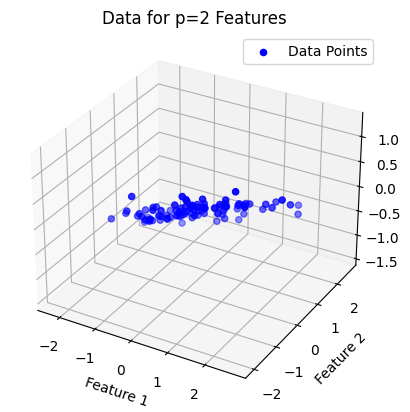

In [77]:
''' 
Plot the data points (y) against their p input parameters (x_j where j ranges from 1 to p)
'''


''' 
Set Data Dimensions for this illustration
'''

# Set Dimensions
p = 2
N = 100
beta_std = 2
X_std = 1
epsilon_std = 0.1

beta = np.random.normal(0, beta_std, p)
X = np.random.normal(0, X_std, (N, p))
epsilon = np.random.normal(0, epsilon_std, N)

y = X @ beta + epsilon


'''
Illustrate Data points in feature-space
''' 

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(X[:,0], X[:,1], y, c='b', marker='o', label='Data Points')

# Set axis labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('y')

# Set the title
ax.set_title('Data for p=2 Features')

# Show the plot
plt.legend()
plt.show()



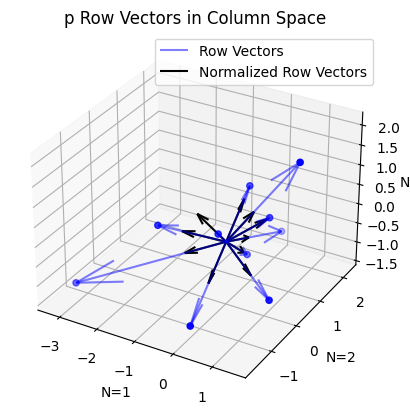

In [90]:
''' 
Plot the p row vectors in Column Space (N axes)
'''


''' 
Set Data Dimensions for this illustration
'''

# Set Dimensions
p = 10
N = 3
beta_std = 2
X_std = 1
epsilon_std = 0.1

beta = np.random.normal(0, beta_std, p)
X = np.random.normal(0, X_std, (N, p))
epsilon = np.random.normal(0, epsilon_std, N)

y = X @ beta + epsilon


''' 
Illustrate p row vectors in column space (dim=N)
'''

# This illustration doesn't work unless we are in three dimensions
assert N == 3

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.full_like(X[0,:], 0)

# Create a 3D scatter plot
ax.quiver(origin, origin, origin, X[0,:], X[1,:], X[2,:], color='b', label='Row Vectors', alpha=0.5)
ax.quiver(origin, origin, origin, X[0,:], X[1,:], X[2,:], color='black', label='Normalized Row Vectors', normalize=True)
ax.scatter(X[0,:], X[1,:], X[2,:], color='b')

# Set axis labels
ax.set_xlabel('N=1')
ax.set_ylabel('N=2')
ax.set_zlabel('N=3')

# Set the title
ax.set_title(f'Row Vectors in Column Space (N={N}, p={p})')

# Show the plot
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


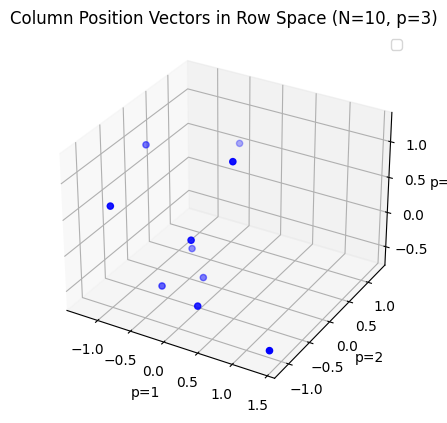

In [94]:
''' 
Plot the N column vectors in Column Space (p axes)
'''


''' 
Set Data Dimensions for this illustration
'''

# Set Dimensions
p = 3
N = 10
beta_std = 2
X_std = 1
epsilon_std = 0.1

beta = np.random.normal(0, beta_std, p)
X = np.random.normal(0, X_std, (N, p))
epsilon = np.random.normal(0, epsilon_std, N)

y = X @ beta + epsilon


''' 
Illustrate N row vectors in row space (dim=p)
'''

# This illustration doesn't work unless we are in three dimensions
assert p == 3

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(X[:,0], X[:,1], X[:,2], color='b')

# Set axis labels
ax.set_xlabel('p=1')
ax.set_ylabel('p=2')
ax.set_zlabel('p=3')

# Set the title
ax.set_title('Column Position Vectors in Row Space (N=10, p=3)')

# Show the plot
plt.legend()
plt.show()



0.0015625